In [4]:
from lmfit import minimize, Parameters, Parameter, report_fit
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

# Lorenz system
The Lorenzs model has three state variables $(x_1,x_2,x_3)$. System corresponds to the equations from a mathematical model for atmospheric convection, where $x_1$, $x_2$, and $x_3$ denote variable proportional to convective intensity, horizontal, and vertical temperature differences. The system is:
$$ \dfrac{dx_1}{dt}=-a x_1+a x_2$$
$$ \dfrac{dx_2}{dt}=-x_1x_3+bx_1-x_2$$
$$ \dfrac{dx_3}{dt}=x_1x_2-cx_3.$$
The Lorenzs system with parameters $a=10$, $b=126.52$ and $c=8/3$ generate chaotic behavior.

The initial contidion is $x_1(0)=-7.69$, $x_2(0)=-15.61$, $x_3(0)=90.39$

In [1]:
# a = 10
def h(xs, t, ps):
    try:
        b = ps['b'].value
        c = ps['c'].value
    except:
        b, c = ps
    x1,x2,x3 = xs

    return [-10*x1+10*x2,-x1*x3+b*x1-x2,x1*x2-c*x3]

In [2]:
def g(t, x0, ps):
    #Solution to the ODE x'(t) = f(t,x,k) with initial condition x(0) = x0
    x = odeint(h, x0, t, args=(ps,))
    return x

In [12]:
#generate real data
b = 126.52
c = 8/3
true_params = [b, c]
x0 = [-7.69,-15.61,90.39]

t = np.linspace(0, 8, 200)
data = g(t, x0, true_params)

In [13]:
# set parameters incluing bounds
params = Parameters()

In [14]:
size = 30
Z=[]
for i in range (size):
        Z.append([0]*size)
    
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

bdata = np.linspace(126.51,126.53,size)
cdata = np.linspace(2.65,2.68,size)
X,Y = np.meshgrid(bdata,cdata)
for i in range(size):
    for j in range(size):
        params.add('b', bdata[i])
        params.add('c', cdata[j])
        Z[i][j] = residual3(params, x0, t, data)
W = np.array(Z)

<IPython.core.display.Javascript object>


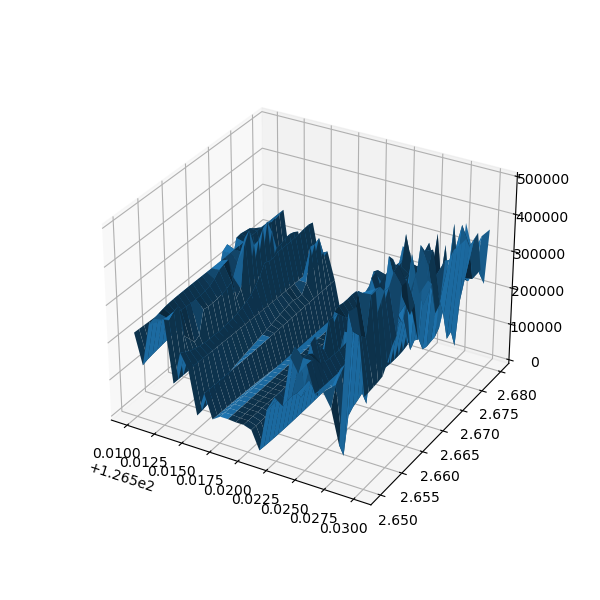

In [15]:
%matplotlib notebook
fig = plt.figure(figsize=(6,6)) 
axes = fig.gca(projection ='3d') 
axes.plot_surface(X, Y, W) 
axes.set_zlim([0,500000]) 
plt.show()

In [16]:
np.min(W)

14.99090916985594